In [2]:
#FOR ANALYSIS/CLEANING/COMPUTATION:
import pandas as pd
import numpy as np

#FOR VISUALIZATION:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
import time
import pandas as pd

print("Loading data file now, this could take a while depending on file size")
start = time.time()
df = pd.read_csv('review_shopping.csv' , delimiter='\t' , names = ['text', 'sentiment'] , header=None) # ADD-CSV
end = time.time()
print("Loading took " + str(round(end - start, 2)) + " seconds")
missing_values = df.isna().sum().sum()
duplicated_values = df.duplicated().sum()
print(f'\nMissing values: {missing_values}')
print(f'Duplicated values: {duplicated_values}')
if missing_values >= 1:
    print('\nMissing values by column:')
    print(df.isna().sum())
print("\nUnique Values in Each Column:")
print(df.nunique())

Loading data file now, this could take a while depending on file size
Loading took 0.03 seconds

Missing values: 0
Duplicated values: 0

Unique Values in Each Column:
text         128
sentiment      2
dtype: int64


In [7]:
df['sentiment'].value_counts()

sentiment
neg    68
pos    60
Name: count, dtype: int64

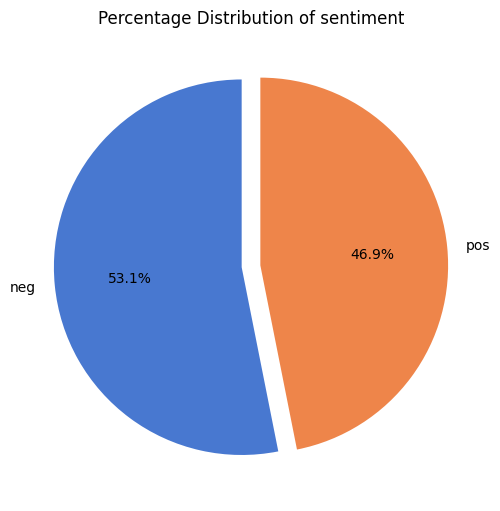

In [8]:
def plot_categorical_distributions(columns, data=df, palette='muted'):
    plt.figure(figsize=(15, 6))  
    
    for i, column_name in enumerate(columns):
        plt.subplot(1, 3, i + 1)  
        value_counts = data[column_name].value_counts()
        value_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette
                            (palette), startangle=90, explode=[0.05] * value_counts.nunique())
        
        plt.title(f'Percentage Distribution of {column_name}')
        plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()


columns_to_plot = ['sentiment']
plot_categorical_distributions(columns_to_plot)

In [9]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())

In [ ]:
import re
def clean_text(text):
    text = re.sub(r'Ã[\x80-\xBF]+', ' ', text)
    text = re.sub(r'[^a-zA-Zก-ฮะ-์\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text.lower()

In [12]:
from pythainlp import word_tokenize
def text_process(text):
    if pd.isna(text):
        return np.nan
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ",))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final


In [14]:
df['text'] = df['text'].apply(clean_text)
df['text_tokens'] = df['text'].apply(text_process)

In [15]:
df.head()

,text,sentiment,text_tokens
0,เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า,neg,เกลียด ชอบ หลอก ให้ สั่งซื้อ ที่ไหนได้ ไม่ มี ...
1,สินค้าด้อยคุณภาพ,neg,สินค้า ด้อย คุณภาพ
2,สินค้าหมดทำไมไม่แจ้งขึ้นว่าหมดอะ กดใส่ตะกร้าไป...,neg,สินค้า หมด ทำไม ไม่ แจ้ง ขึ้น ว่า หมด อะ กด ใส...
3,อย่าทำแบบนี้กับใครอีกนะค่ะแย่มากค่ะ,neg,อย่า ทำ แบบนี้ กับ ใคร อีก นะ ค่ะ แย่มาก ค่ะ
4,คือเเบบผิดหวังมาก เเย่ที่สุดได้ของมาฝาเเตก เเต...,neg,คือ เเบบ ผิดหวัง มาก เเย่ ที่สุด ได้ ของ มา ฝา...


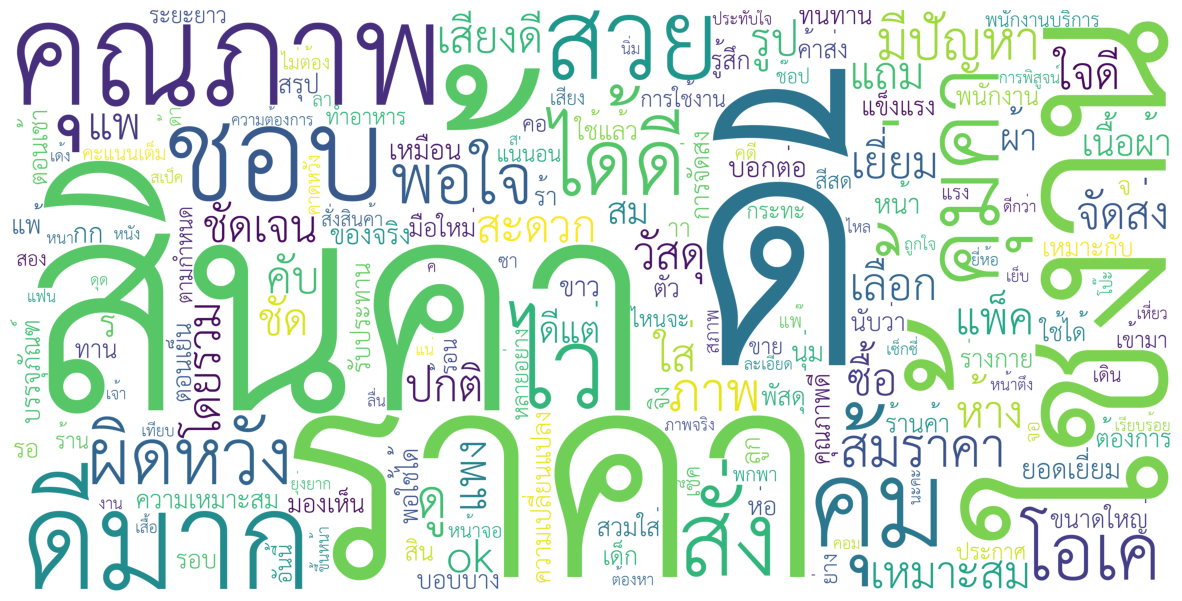

In [51]:
from wordcloud import WordCloud, STOPWORDS
df_pos = df[df['sentiment'] == 'pos']
pos_word_all = " ".join(text for text in df_pos['text_tokens'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'THSarabunNew.ttf'
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

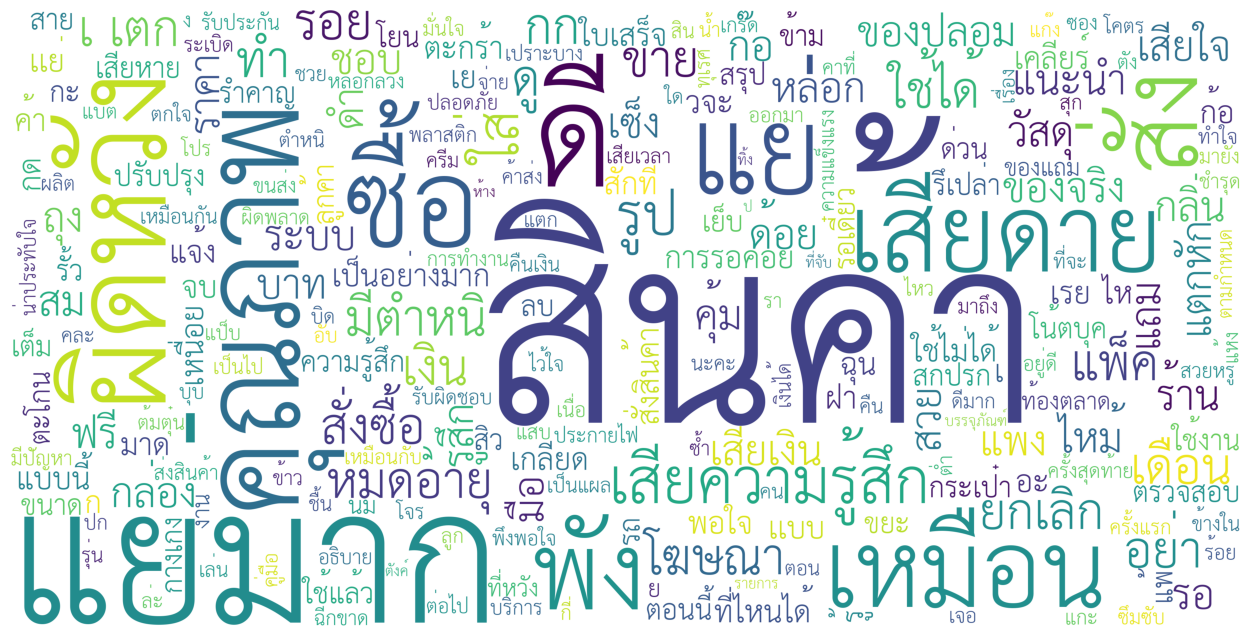

In [52]:
df_neg = df[df['sentiment'] == 'neg']
neg_word_all = " ".join(text for text in df_neg['text_tokens'])
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(neg_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X = df[['text_tokens']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
cvec.vocabulary_

{'เสียดาย': 330,
 'ที่': 132,
 'ไว้ใจ': 404,
 'ใช้': 384,
 'บริการ': 153,
 'ผิดหวัง': 171,
 'มาก': 189,
 'เอา': 345,
 'สินค้า': 257,
 'ของ': 22,
 'คุณ': 52,
 'คือ': 51,
 'ไป': 398,
 'เถอะ': 306,
 'แล้ว': 371,
 'คืนเงิน': 50,
 'ให้': 394,
 'เรา': 319,
 'สั่ง': 251,
 'ก็': 15,
 'บ่อย': 160,
 'ต่อไป': 116,
 'ไม่': 399,
 'แย่มาก': 369,
 'ได้รับ': 397,
 'เร็ว': 321,
 'ค่ะ': 59,
 'และ': 370,
 'มี': 193,
 'คุณภาพ': 53,
 'สวมใส่': 246,
 'สบาย': 241,
 'ตัว': 109,
 'เลย': 322,
 'ขนส่ง': 19,
 'ช้า': 84,
 'มีตำหนิ': 194,
 'แพ็ค': 363,
 'ดี': 91,
 'รอย': 209,
 'บุบ': 159,
 'จอ': 68,
 'ใหญ่': 392,
 'เสียง': 328,
 'ชัดเจน': 80,
 'ดีมาก': 93,
 'โดยรวม': 376,
 'คุ้มค่า': 56,
 'ซื้อ': 88,
 'มายัง': 192,
 'ทัน': 126,
 'เล่น': 325,
 'พัง': 179,
 'ซะ': 86,
 'นม': 140,
 'ใกล้': 381,
 'หมดอายุ': 271,
 'ครั้งนี้': 35,
 'ครั้งสุดท้าย': 36,
 'นะคะ': 142,
 'ที่จะ': 133,
 'ผ้า': 172,
 'นิ่ม': 145,
 'เด้ง': 303,
 'ดีกว่า': 92,
 'คิด': 48,
 'ไว้': 403,
 'ชอบ': 78,
 'คะ': 45,
 'เเบบ': 346,
 'เเย่': 347,
 'ที่สุด': 1

In [18]:
train_bow = cvec.transform(X_train['text_tokens'])
train_bow_df = pd.DataFrame(train_bow.toarray(), 
                            columns=cvec.get_feature_names_out(),
                            index=X_train['text_tokens'])

In [19]:
train_bow_df.head()

,ok,ก,กก,กด,กลิ่น,กล่อง,กว่า,กัน,กับ,การ,...,ไม่ค่อย,ไม่ต้อง,ไว,ไว้,ไว้ใจ,ไห,ไหนจะ,ไหม้,ไหล,ไหว
text_tokens,,,,,,,,,,,,,,,,,,,,,
เสียดาย ที่ ไว้ใจ ใช้ บริการ ผิดหวัง มาก เอา สินค้า ของ คุณ คือ ไป เถอะ แล้ว คืนเงิน ให้ เรา สั่ง ของ ก็ บ่อย ต่อไป ไม่ สั่ง แล้ว แย่มาก,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
ได้รับ สินค้า เร็ว ค่ะ และ สินค้า ก็ มี คุณภาพ สวมใส่ สบาย ตัว มาก เลย ค่ะ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ขนส่ง ก็ ช้า สินค้า มีตำหนิ แพ็ค สินค้า ไม่ ดี มี รอย บุบ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
จอ ใหญ่ มาก คุณภาพ เสียง ชัดเจน ดีมาก โดยรวม แล้ว คุ้มค่า มาก,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ซื้อ มายัง ไม่ ทัน เล่น เลย พัง ซะ แล้ว,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bow, y_train)

LogisticRegression()

In [21]:
from sklearn.metrics import confusion_matrix , classification_report
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr.predict(test_bow)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

         neg       0.90      0.90      0.90        20
         pos       0.89      0.89      0.89        19

    accuracy                           0.90        39
   macro avg       0.90      0.90      0.90        39
weighted avg       0.90      0.90      0.90        39



In [35]:
my_text = 'แมวเหี้ยจริงๆและดีมาก'
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
print(my_predictions)

['pos']
